In [110]:
import numpy as np
import pandas as pd
import geopandas as gpd
import math

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from itertools import combinations

import seaborn as sns
import os


In [111]:
DEFAULT_CRS = "EPSG:4326"
RANDOM_STATE = 42

In [112]:
#os.chdir('../')


In [113]:
# return the current working directory
def get_cwd():
    return os.getcwd()  
get_cwd()

'/Users/giovanniattina/Library/CloudStorage/GoogleDrive-giovanni.nascimento@usp.br/Meu Drive/Mestrado/PTR5927 - Análise Espacial (2024)/trabalho'

In [114]:
file_path = 'data/generate/clusters.gpkg'
cluster_gdf = gpd.read_file(file_path)

In [115]:
cluster_gdf.head()

,qnt_unidades_residencias_sum,esp_1,area_mean,area_count,D1_012_p,D1_017_p,D1_035_p,D1_044_p,DCL_mean,cluster_regularidade_fundiaria,cluster_infraestrutura_urbana,cluster_ambiente_construído,cluster_all,is_fav_comunidade,geometry
0,111.0,114.0,147.878013,63.0,1.000000,1.000000,1.0,1.000000,6.750791,1,0,3,3,0,"POLYGON ((-46.63592 -23.53032, -46.63664 -23.5..."
1,108.0,157.0,80.865535,103.0,1.000000,0.989796,1.0,1.000000,10.788276,1,0,4,1,0,"POLYGON ((-46.53650 -23.53972, -46.53722 -23.5..."
2,95.0,70.0,90.313326,26.0,1.000000,1.000000,1.0,1.000000,7.683747,1,0,3,3,0,"POLYGON ((-46.66886 -23.59437, -46.66958 -23.5..."
3,0.0,471.0,60.442236,174.0,0.996032,0.992063,1.0,0.996032,6.340379,0,0,0,1,1,"POLYGON ((-46.59115 -23.61353, -46.59187 -23.6..."
4,17.0,20.0,180.344743,47.0,1.000000,0.640000,1.0,1.000000,4.947622,3,2,3,3,0,"POLYGON ((-46.59688 -23.46650, -46.59760 -23.4..."


In [116]:
cluster_gdf.shape

(53559, 15)

In [117]:
col_dic = { 
    "qnt_unidades_residencias_sum": "Soma quantidade de Unidades IPTU", # regularidade fundiária dos
    "esp_1": "Quantidade de Residenciais CNEFE 2022", # regularidade fundiária dos
    "area_mean": "Média da área de construção Open Buildings", # ambiente construído
    #"area_std": "Desvio Padrão Soma da área de construção Open Buildings", #ambiente construído
    "area_count": "Quantidade de construção Open Buildings", #ambiente construído
    "D1_012_p": "Domicílios com acesso à rede de água da rede geral ", #infraestrutura urbana
    "D1_017_p": "Domicílios com acesso à rede de esgoto geral", #infraestrutura urbana
    "D1_035_p": "Domicílios com lixo coletado", #infraestrutura urbana
    "D1_044_p": "Domicílios com energia elétrica de companhia distribuidora", #infraestrutura urbana
    "DCL_mean": "Declividade média do terreno em km"

    
}

In [118]:
file_name = os.path.splitext(os.path.basename(file_path))[0]


# Create the results directory
results_dir = f'results/{file_name}'
os.makedirs(results_dir, exist_ok=True)

# Analíse descritiva de cada Cluster

In [119]:
# variaveis de cada cluster
var_infra_urbana =  ['D1_012_p', "D1_017_p", "D1_035_p", "D1_044_p"]
var_regul_fun = ["qnt_unidades_residencias_sum", "esp_1"]
var_ambiente_construído = ['area_count', "area_mean"]

cluster_infraestrutura_urbana = 'cluster_infraestrutura_urbana'
cluster_ambiente_construído = 'cluster_ambiente_construído'
cluster_regularidade_fundiaria = 'cluster_regularidade_fundiaria'
cluster_all = 'cluster_all'

## cluster_infraestrutura_urbana

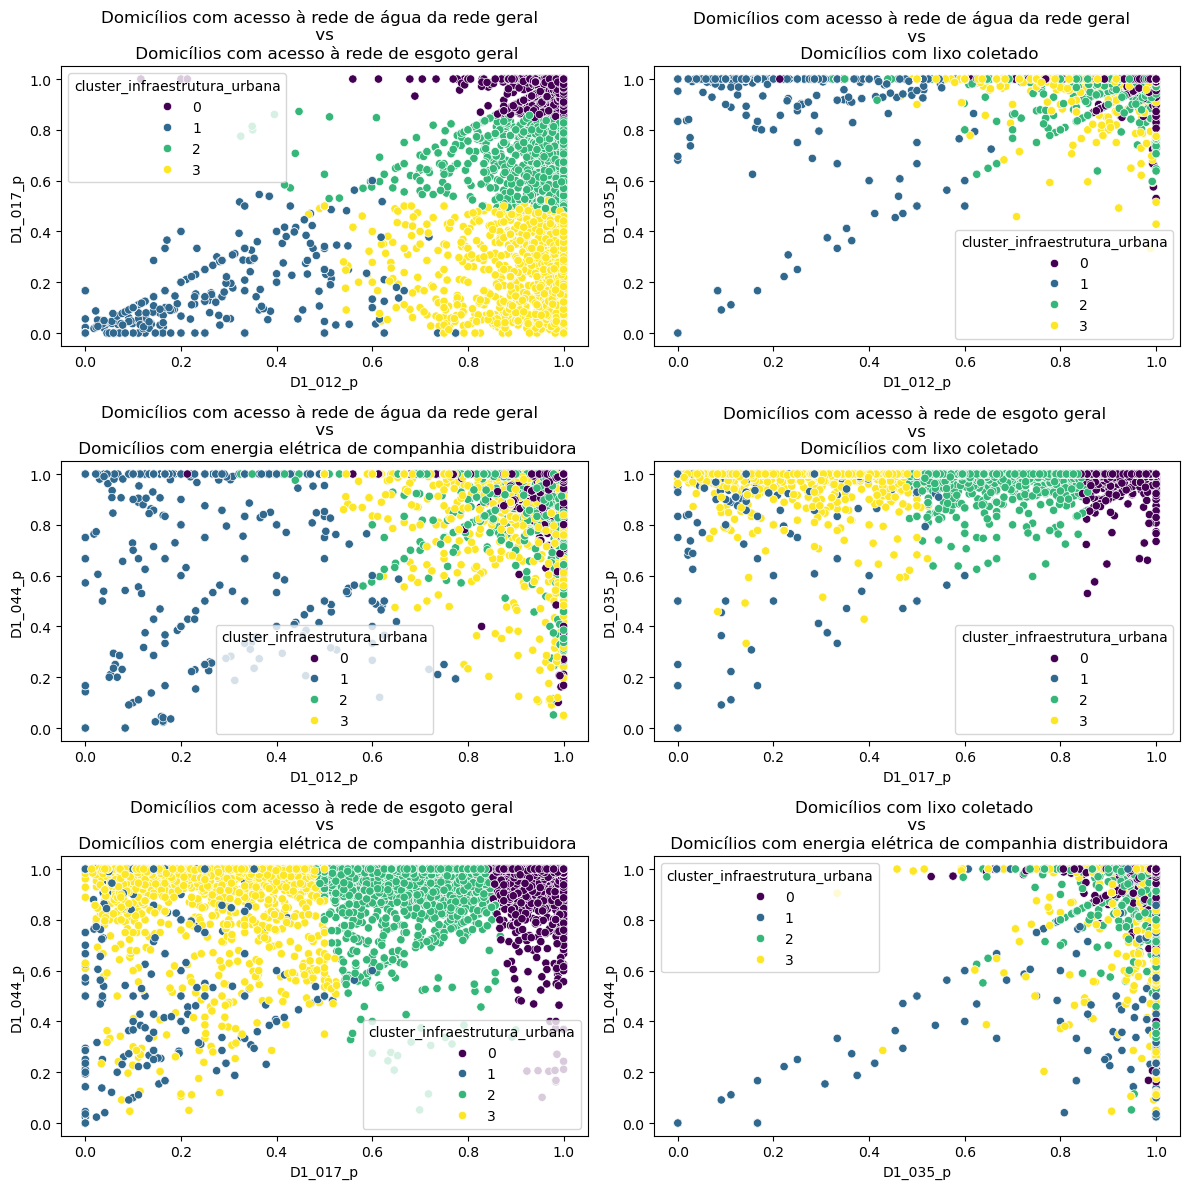

In [120]:
# Gerar combinações dos nomes das variáveis (colunas)
combs = list(combinations(cluster_gdf[var_infra_urbana], 2))

# Número de colunas que desejamos (2 por linha)
n_cols = 2
n_rows = math.ceil(len(combs) / n_cols)  # Calcula o número de linhas necessário

# Definir o tamanho da figura com base no número de combinações
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))  # 2 plots por linha
axes = axes.flatten()  # Flatten para iterar facilmente sobre os eixos

# Criar um scatter plot para cada combinação de variáveis
for i, (var_x, var_y) in enumerate(combs):
    sns.scatterplot(ax=axes[i], data=cluster_gdf, x=var_x, y=var_y, hue=cluster_infraestrutura_urbana, palette='viridis')
    axes[i].set_title(f'{col_dic[var_x]} \n vs \n {col_dic[var_y]}')

# Remover eixos extras, se houver
if len(combs) < len(axes):
    for j in range(len(combs), len(axes)):
        fig.delaxes(axes[j])

# Ajustar o layout
plt.tight_layout()
plt.show()

fig.savefig(os.path.join(results_dir, 'scatter_infraestrutura_urbana.png'), dpi=300)


In [121]:
favela_comunidade_aux = {'is_fav_comunidade': 'sum', 'geometry': 'count'}

In [147]:
cluster_infraestrutura_urbana_aux = {key:['mean', 'std'] for key in var_infra_urbana}
cluster_infraestrutura_urbana_aux.update(favela_comunidade_aux)
cluster_infraestrutura_urbana_agg = (
    cluster_gdf.groupby('cluster_infraestrutura_urbana').agg(
        cluster_infraestrutura_urbana_aux
    ).reset_index()
)

cluster_infraestrutura_urbana_agg['is_fav_percentage'] = cluster_infraestrutura_urbana_agg['is_fav_comunidade']['sum'] / cluster_infraestrutura_urbana_agg['geometry']['count']

cluster_infraestrutura_urbana_agg

cluster_infraestrutura_urbana  D1_012_p            D1_017_p            \
                                     mean       std      mean       std   
0                             0  0.997952  0.012876  0.980655  0.033072   
1                             1  0.218238  0.178344  0.150780  0.146340   
2                             2  0.976005  0.063067  0.705779  0.100446   
3                             3  0.936155  0.114305  0.273027  0.141980   

   D1_035_p            D1_044_p           is_fav_comunidade geometry  \
       mean       std      mean       std               sum    count   
0  0.999166  0.008464  0.995134  0.026196               396    44450   
1  0.827500  0.330598  0.670883  0.362993                31      659   
2  0.992405  0.032555  0.967714  0.081894               212     5665   
3  0.982940  0.058588  0.924371  0.148782               218     2785   

  is_fav_percentage  
                     
0          0.008909  
1          0.047041  
2          0.037423  
3          0.078276

In [145]:
cluster_regul_fun_agg['is_fav_comunidade']['sum'] / cluster_regul_fun_agg['geometry']['count']

0    0.123719
1    0.012144
2    0.000535
3    0.004238
4    0.001078
dtype: float64

## cluster_regularidade_fundiaria

In [123]:
cluster_gdf['indice_regularidade_fundiaria'] = cluster_gdf['qnt_unidades_residencias_sum']/cluster_gdf['esp_1']
cluster_gdf.replace([np.inf, -np.inf], 0, inplace=True)
cluster_gdf['indice_regularidade_fundiaria'] = cluster_gdf['indice_regularidade_fundiaria'].fillna(0)

In [148]:
cluster_regul_fun_aux = {key:['mean', 'std'] for key in var_regul_fun} 
cluster_regul_fun_aux.update(favela_comunidade_aux)
cluster_regul_fun_aux.update({'indice_regularidade_fundiaria':['mean', 'std']})


cluster_regul_fun_agg = (
    cluster_gdf.groupby(cluster_regularidade_fundiaria).agg(
       cluster_regul_fun_aux
    ).reset_index()
)

cluster_regul_fun_agg['is_fav_percentage'] = cluster_regul_fun_agg['is_fav_comunidade']['sum'] / cluster_regul_fun_agg['geometry']['count']

cluster_regul_fun_agg

cluster_regularidade_fundiaria qnt_unidades_residencias_sum              \
                                                         mean         std   
0                              0                    35.886527   36.581206   
1                              1                    53.869619   29.902783   
2                              2                   207.994914   59.487163   
3                              3                    18.989811   17.828974   
4                              4                   425.504310  157.919217   

        esp_1             is_fav_comunidade geometry  \
         mean         std               sum    count   
0  242.634477   86.299129               483     3904   
1  103.369575   30.083763               277    22810   
2  189.530514   76.737876                 2     3736   
3   30.810288   21.573384                94    22181   
4  408.456897  163.660501                 1      928   

  indice_regularidade_fundiaria            is_fav_percentage  
                           mean        std                    
0                      0.156043   0.153037          0.123719  
1                      0.723553   3.646417          0.012144  
2                      2.479627  14.234105          0.000535  
3                      1.105177   4.192946          0.004238  
4                      1.219038   0.769876          0.001078

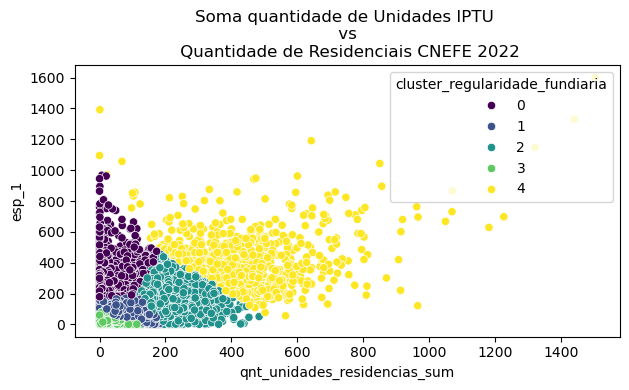

In [125]:
# Gerar combinações dos nomes das variáveis (colunas)
combs = list(combinations(cluster_gdf[var_regul_fun], 2))

# Número de colunas que desejamos (2 por linha)
n_cols = 2
n_rows = math.ceil(len(combs) / n_cols)  # Calcula o número de linhas necessário

# Definir o tamanho da figura com base no número de combinações
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))  # 2 plots por linha
axes = axes.flatten()  # Flatten para iterar facilmente sobre os eixos

# Criar um scatter plot para cada combinação de variáveis
for i, (var_x, var_y) in enumerate(combs):
    sns.scatterplot(ax=axes[i], data=cluster_gdf, x=var_x, y=var_y, hue=cluster_regularidade_fundiaria, palette='viridis')
    axes[i].set_title(f'{col_dic[var_x]} \n vs \n {col_dic[var_y]}')

# Remover eixos extras, se houver
if len(combs) < len(axes):
    for j in range(len(combs), len(axes)):
        fig.delaxes(axes[j])

# Ajustar o layout
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, 'scatter_regul_fun.png'), dpi=300)


## cluster_ambiente_construído

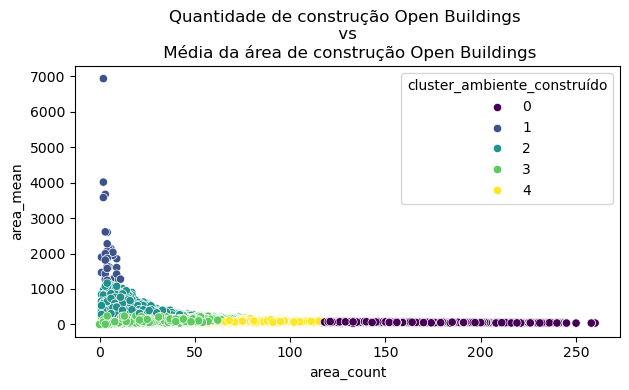

In [126]:
# Gerar combinações dos nomes das variáveis (colunas)
combs = list(combinations(cluster_gdf[var_ambiente_construído], 2))

# Número de colunas que desejamos (2 por linha)
n_cols = 2
n_rows = math.ceil(len(combs) / n_cols)  # Calcula o número de linhas necessário

# Definir o tamanho da figura com base no número de combinações
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))  # 2 plots por linha
axes = axes.flatten()  # Flatten para iterar facilmente sobre os eixos

# Criar um scatter plot para cada combinação de variáveis
for i, (var_x, var_y) in enumerate(combs):
    sns.scatterplot(ax=axes[i], data=cluster_gdf, x=var_x, y=var_y, hue=cluster_ambiente_construído, palette='viridis')
    axes[i].set_title(f'{col_dic[var_x]} \n vs \n {col_dic[var_y]}')

# Remover eixos extras, se houver
if len(combs) < len(axes):
    for j in range(len(combs), len(axes)):
        fig.delaxes(axes[j])

# Ajustar o layout
plt.tight_layout()
plt.show()

fig.savefig(os.path.join(results_dir, 'scatter_ambiente_construído.png'), dpi=300)

In [149]:
cluster_ambiente_construído_aux = {key:['mean', 'std'] for key in var_ambiente_construído}
cluster_ambiente_construído_aux.update(favela_comunidade_aux)

cluster_ambiente_construído_agg = (
    cluster_gdf.groupby(cluster_ambiente_construído).agg(
        cluster_ambiente_construído_aux
    ).reset_index()
)

cluster_ambiente_construído_agg['is_fav_percentage'] = cluster_ambiente_construído_agg['is_fav_comunidade']['sum'] / cluster_ambiente_construído_agg['geometry']['count']

cluster_ambiente_construído_agg

cluster_ambiente_construído  area_count               area_mean  \
                                     mean        std         mean   
0                           0  145.303926  21.713484    64.498721   
1                           1    4.843750   2.677377  2084.291017   
2                           2   18.438874   9.796365   378.882079   
3                           3   37.053389  16.879294   120.946087   
4                           4   90.920087  16.026273    83.533452   

               is_fav_comunidade geometry is_fav_percentage  
           std               sum    count                    
0     9.466989               658    14237          0.046218  
1  1132.967202                 0       32          0.000000  
2   156.361763                 0     1456          0.000000  
3    45.610339                45    18075          0.002490  
4    16.028742               154    19759          0.007794

## Geral

In [128]:
cluster_all_aux = {}
cluster_all_aux.update(cluster_infraestrutura_urbana_aux)
cluster_all_aux.update(cluster_ambiente_construído_aux)
cluster_all_aux.update(cluster_regul_fun_aux)
cluster_all_aux.update({"geometry": "count"})

In [152]:
cluster_all_agg = (cluster_gdf
                                      .groupby("cluster_all")
                                      .agg(cluster_all_aux)).reset_index()


cluster_all_agg['is_fav_percentage'] = cluster_all_agg['is_fav_comunidade']['sum'] / cluster_all_agg['geometry']['count']

cluster_all_agg[['is_fav_comunidade', 'geometry', 'is_fav_percentage']]

,is_fav_comunidade,geometry,is_fav_percentage
,sum,count,
0,10,4190,0.002387
1,736,26141,0.028155
2,53,915,0.057923
3,58,22313,0.002599


# Boxplot das varíaives para cada cluster

In [130]:
def plot_boxplots_cluster(df, cluster_column):
    variables = list(df.columns)
    variables.remove(cluster_column)
    # Set up the figure size
    plt.figure(figsize=(12, len(variables) * 5))

    # Loop through each variable to create subplots
    for i, var in enumerate(variables):
        plt.subplot(len(variables), 1, i + 1)
        
        # Create a boxplot for each variable with cluster as the hue
        sns.boxplot(x=cluster_column, y=var, data=df, palette='Set2', hue=cluster_column, legend=False)
        
        # Set the title for each plot
        plt.title(f'Boxplot of {var} by Cluster {cluster_column}')
        plt.xlabel('Cluster')
        plt.ylabel(var)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()
    fig.savefig(os.path.join(results_dir, f'boxplot_{cluster_column}.png'), dpi=300)

## cluster_infraestrutura_urbana

In [131]:
cluster_gdf[var_infra_urbana + [cluster_infraestrutura_urbana]]

,D1_012_p,D1_017_p,D1_035_p,D1_044_p,cluster_infraestrutura_urbana
0,1.000000,1.000000,1.0,1.000000,0
1,1.000000,0.989796,1.0,1.000000,0
2,1.000000,1.000000,1.0,1.000000,0
3,0.996032,0.992063,1.0,0.996032,0
4,1.000000,0.640000,1.0,1.000000,2
...,...,...,...,...,...
53554,1.000000,0.827160,1.0,1.000000,2
53555,0.877551,0.040816,1.0,1.000000,3
53556,1.000000,0.979167,1.0,1.000000,0
53557,1.000000,1.000000,1.0,1.000000,0


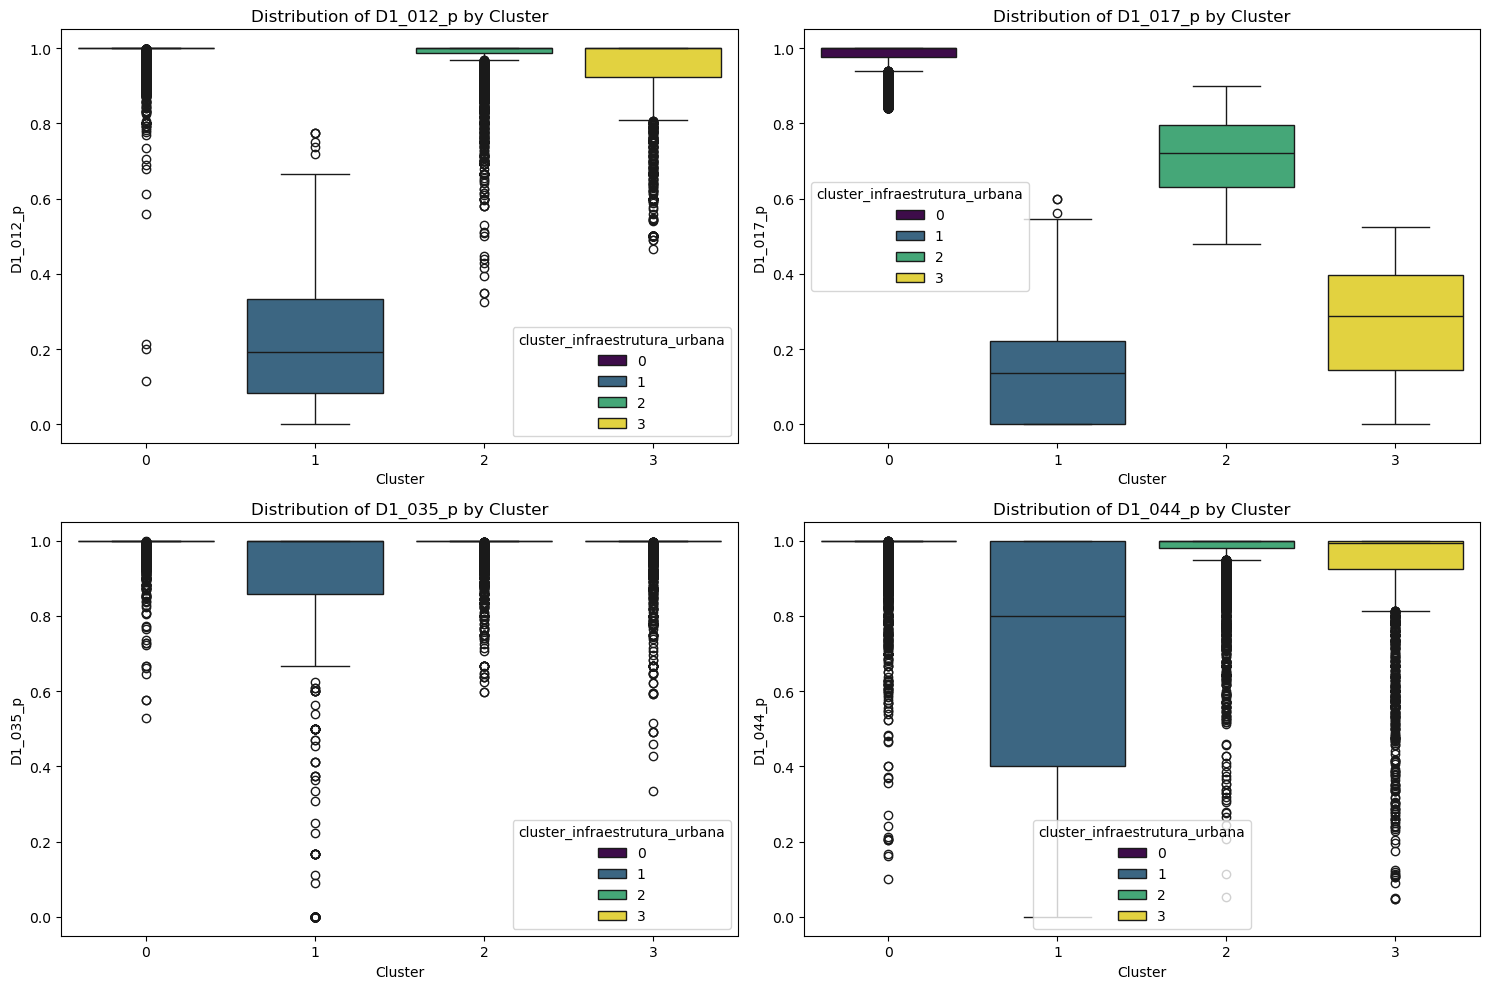

In [132]:
# Creating subplots for each variable
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid for 4 plots
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(var_infra_urbana):
    sns.boxplot(ax=axes[i], data=cluster_gdf, x=cluster_infraestrutura_urbana, y=col, hue=cluster_infraestrutura_urbana, palette='viridis')
    axes[i].set_title(f'Distribution of {col} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, 'boxplot_infraestrutura_urbana.png'), dpi=300)

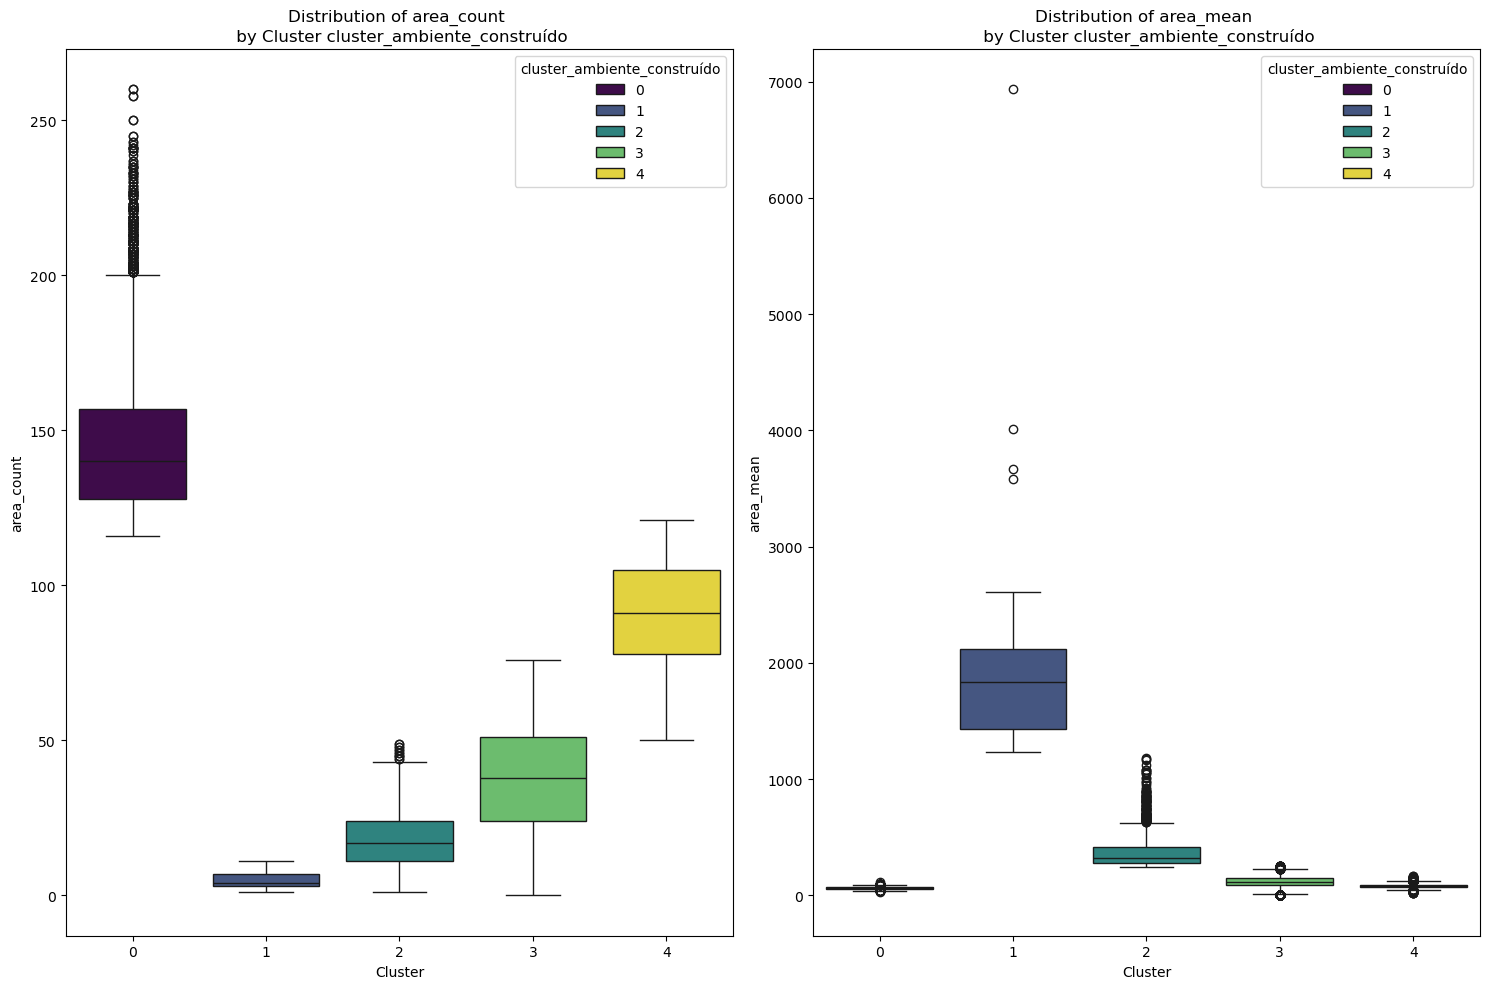

In [133]:


# Creating subplots for each variable
fig, axes = plt.subplots(1, 2, figsize=(15, 10))  # 2x2 grid for 4 plots
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(var_ambiente_construído):
    sns.boxplot(ax=axes[i], data=cluster_gdf, x=cluster_ambiente_construído, y=col,  hue=cluster_ambiente_construído, palette='viridis')
    axes[i].set_title(f'Distribution of {col} \n by Cluster {cluster_ambiente_construído}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, 'boxplot_ambiente_construído.png'), dpi=300)

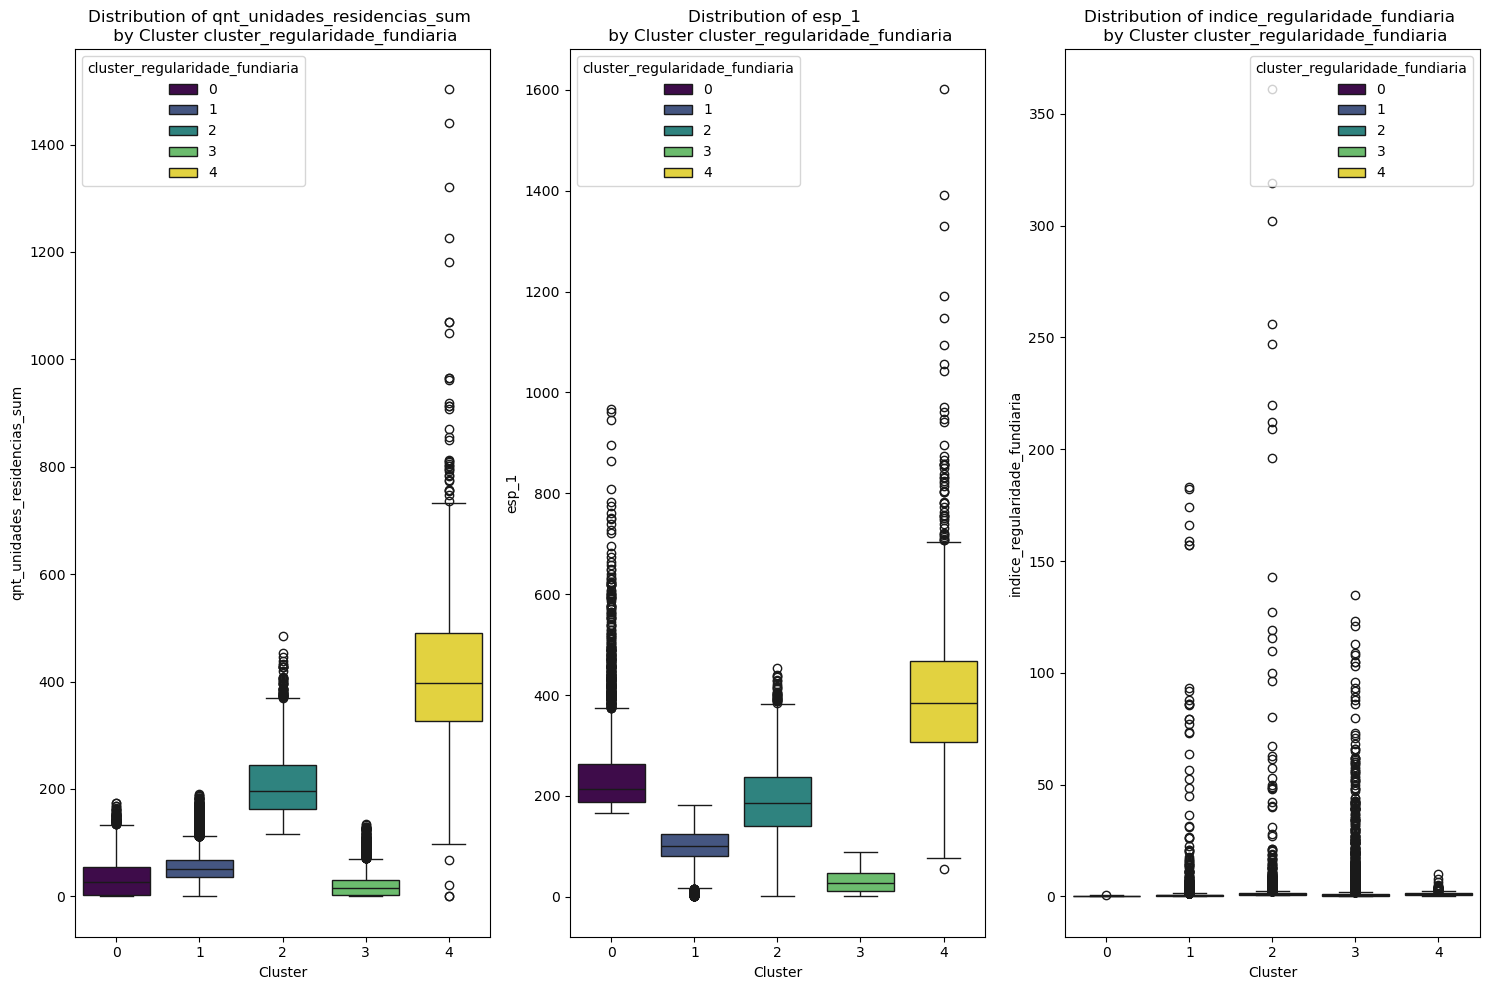

In [134]:

cluster_regularidade_fundiaria = 'cluster_regularidade_fundiaria'

# Creating subplots for each variable
fig, axes = plt.subplots(1, 3, figsize=(15, 10))  # 2x2 grid for 4 plots
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(var_regul_fun+['indice_regularidade_fundiaria']):
    sns.boxplot(ax=axes[i], data=cluster_gdf, x=cluster_regularidade_fundiaria, y=col,  hue=cluster_regularidade_fundiaria,palette='viridis')
    axes[i].set_title(f'Distribution of {col} \n by Cluster {cluster_regularidade_fundiaria}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, 'boxplot_regularidade_fundiaria.png'), dpi=300)

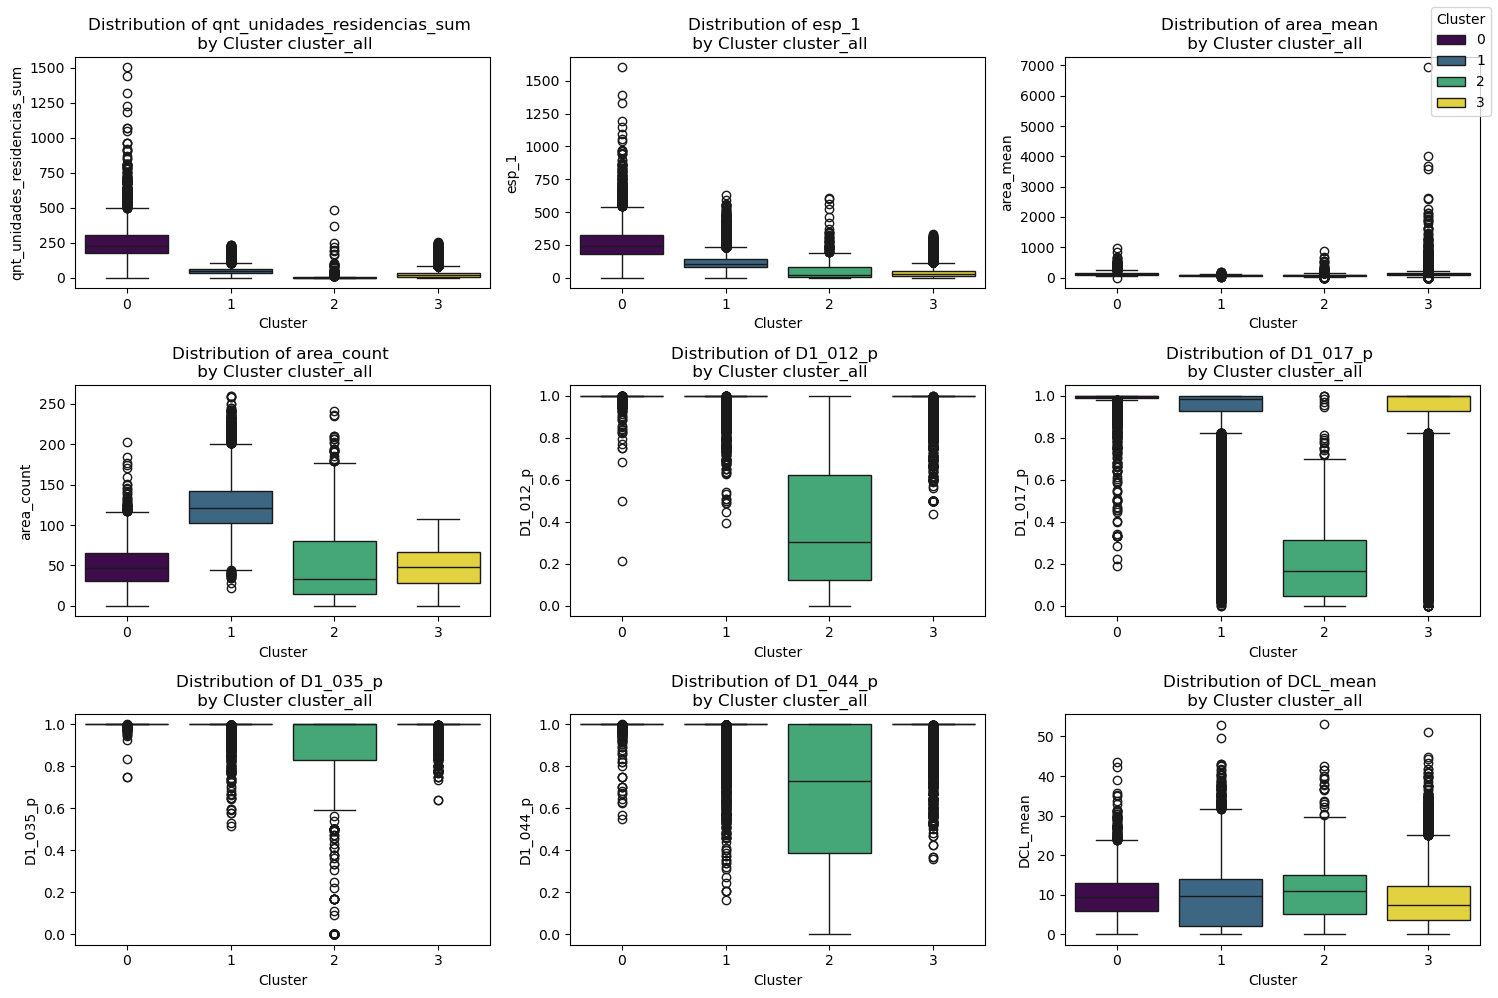

In [135]:
cluster_all = 'cluster_all'

# Creating subplots for each variable
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # 3x3 grid for 9 plots
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(col_dic.keys()):
    sns.boxplot(ax=axes[i], data=cluster_gdf, x=cluster_all, y=col, hue=cluster_all, palette='viridis')
    axes[i].set_title(f'Distribution of {col} \n by Cluster {cluster_all}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(col)

# Remove individual legends
for ax in axes:
    ax.legend_.remove()

# Add a single legend to the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Cluster')

plt.tight_layout()
plt.show()
fig.savefig(os.path.join(results_dir, 'boxplot_all_clusters.png'), dpi=300)

# Maps

/opt/anaconda3/envs/scriptsMestrado/lib/python3.12/site-packages/geoplot/geoplot.py:708: UserWarning: Could not set plot extent successfully due to numerical instability. Try setting extent manually. Defaulting to a global extent.
  warnings.warn(
/opt/anaconda3/envs/scriptsMestrado/lib/python3.12/site-packages/geoplot/geoplot.py:1699: UserWarning: Generating a webmap at zoom level 10 for the given plot extent requires downloading 786175 individual tiles. This slows down plot generation and places additional pressure on the tile provider's server, which many deny your request when placed under high load or high request volume. Consider setting "zoom" to -12 instead. This is the recommended zoom level for the given plot extent.
  warnings.warn(


KeyboardInterrupt: 

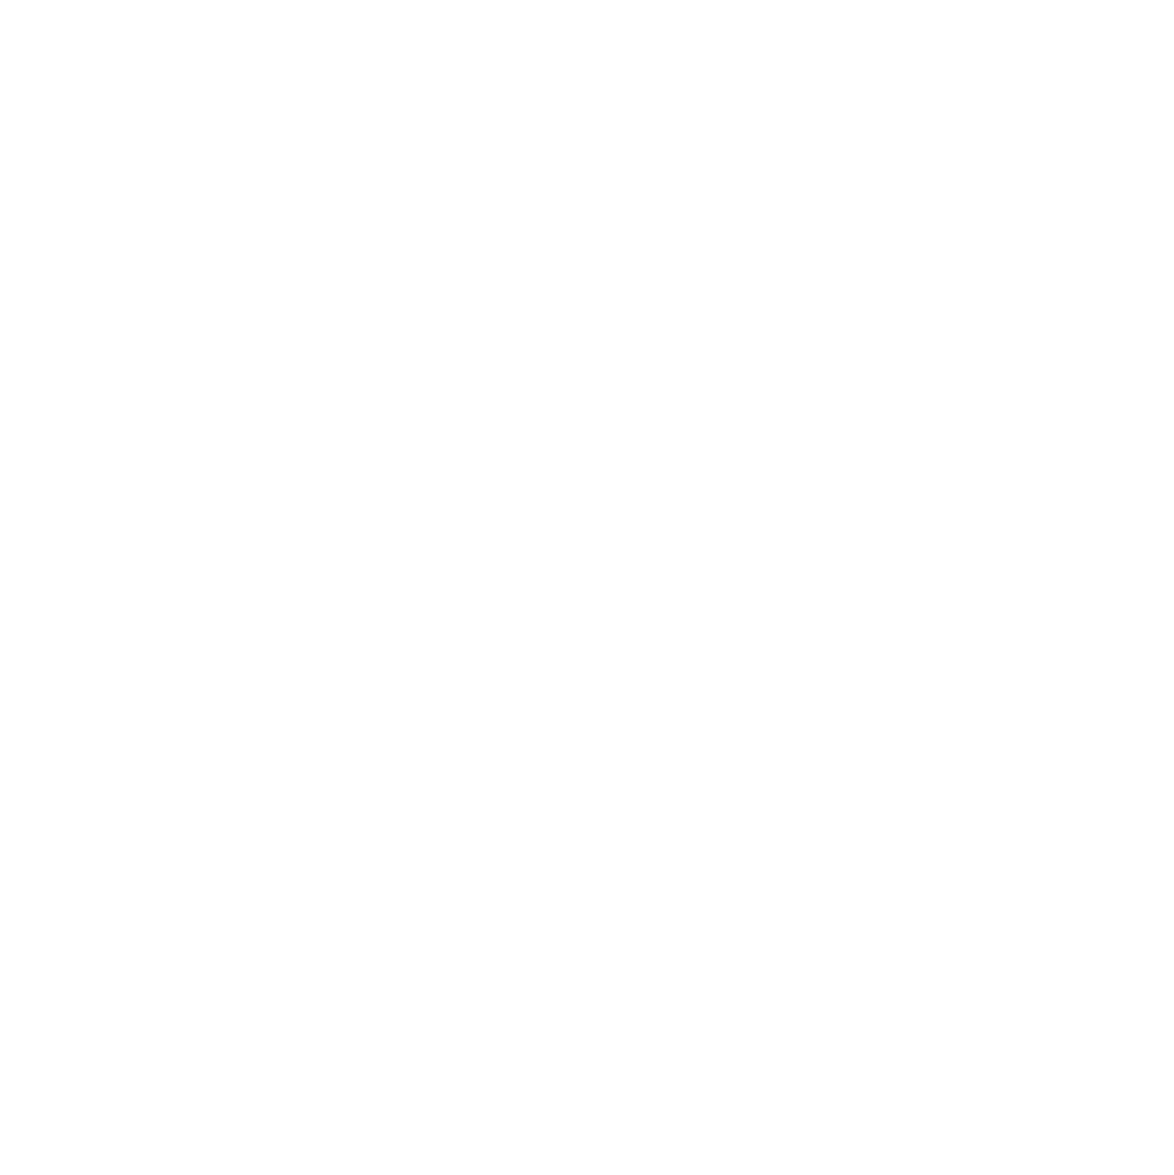

In [136]:
from matplotlib.colors import ListedColormap
import geoplot as gplt
import geoplot.crs as gcrs

import folium
import matplotlib.patches as mpatches

def plot_choropleth(cluster_column):
    # Define a colormap with discrete colors
    cmap = ListedColormap(sns.color_palette("husl", n_colors=len(np.unique(cluster_gdf[cluster_column]))))

    # Plot the choropleth map with a webmap background
    fig, ax = plt.subplots(1, 1, figsize=(15, 15), subplot_kw={'projection': gcrs.WebMercator()})
    gplt.webmap(cluster_gdf.to_crs(epsg=3857), ax=ax, projection=gcrs.WebMercator(), zoom=10)  # Set a valid zoom level
    cluster_gdf.to_crs(epsg=3857).plot(column=cluster_column, cmap=cmap, legend=False, ax=ax, edgecolor='none')

    # Create custom legend
    handles = []
    for cluster_num in np.unique(cluster_gdf[cluster_column]):
        color = cmap(cluster_num)
        patch = mpatches.Patch(color=color, label=f'Cluster {cluster_num}')
        handles.append(patch)

    plt.legend(handles=handles, title="Clusters")
    plt.title(f"Clusterização do {cluster_column.replace('_', ' ').title()}")
    plt.show()

# Example usage:
plot_choropleth('cluster_infraestrutura_urbana')
#plot_choropleth('cluster_ambiente_construído')
#plot_choropleth('cluster_regularidade_fundiaria')
#plot_choropleth('cluster_all')



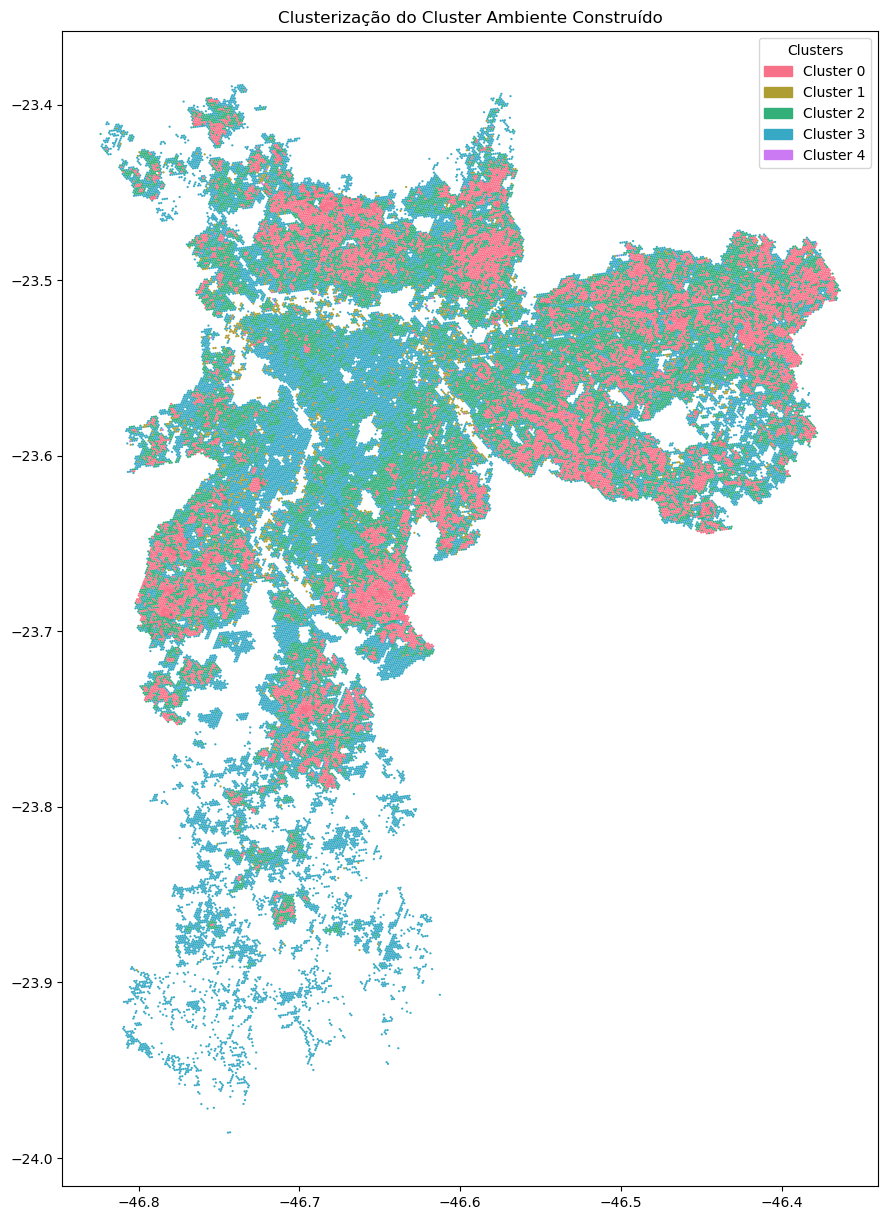

In [90]:
plot_choropleth('cluster_ambiente_construído')


In [99]:
# generate the code of function plot_choropleth with the lib geoplot
def plot_choropleth(cluster_column):
    # Define a colormap with discrete colors
    cmap = ListedColormap(sns.color_palette("husl", n_colors=len(np.unique(cluster_gdf[cluster_column]))))

    # Plot the choropleth map
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    #gplt.polyplot(cluster_gdf, ax=ax, edgecolor='black', linewidth=1, zorder=1)
    gplt.choropleth(cluster_gdf, hue=cluster_column, cmap=cmap, legend=True, ax=ax)

    plt.title(f"Clusterização do {cluster_column.replace('_', ' ').title()}")
    plt.show()

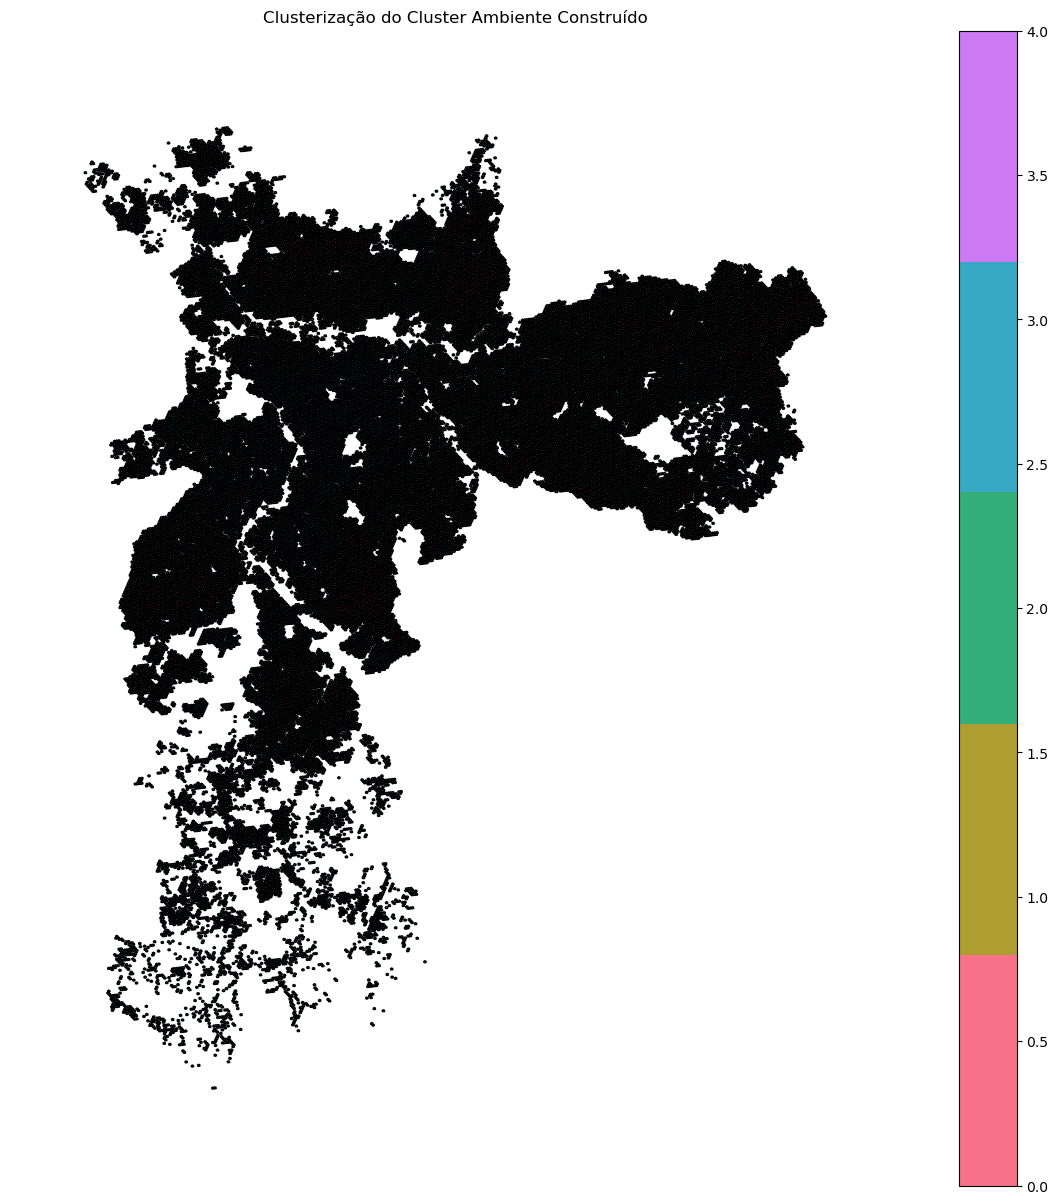

In [100]:

plot_choropleth('cluster_ambiente_construído')
